# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_house_price = pd.read_csv(r"C:\Users\LENOVO\Desktop\数据分析文件夹\07 数据分析篇\house_price.csv")

In [3]:
original_house_price.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
353,3780000,2856,3,1,3,yes,no,no,no,no,0,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
447,3150000,3500,2,1,1,no,no,yes,no,no,0,no,semi-furnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
470,3010000,5076,3,1,1,no,no,no,no,no,0,no,unfurnished
163,5425000,6825,3,1,1,yes,yes,yes,no,yes,0,yes,semi-furnished
68,6860000,6000,3,1,1,yes,no,no,no,yes,1,no,furnished
299,4200000,7000,3,1,1,yes,no,no,no,no,3,no,furnished
47,7490000,6600,3,1,4,yes,no,no,no,yes,3,yes,furnished
199,4907000,4200,3,1,2,yes,no,no,no,no,1,no,furnished


## 评估数据

从随机抽取的10条数据来看，数据满足每行是一个实例，每列是一个变量，每个单元格是一个值的条件。整体规整。  
下面我们将从缺失数据、不一致数据、重复数据和不合理数据进行评估。

### 评估缺失数据

**评估结论：无缺失数据。**

In [4]:
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
original_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


数据如上，不存在缺失值，但是有几个变量的type需要变成分类变量category：bedrooms(卧室)、bathrooms(卫生间)、stories(楼层)、mainroad(是否挨着主路)、guestroom(客房)、basement(地下室)、hotwaterheating(热水器)、airconditioning(空调)、prefarea(是否位于城市首选社区)、furnishingstatus(装修状态)

In [6]:
original_house_price["mainroad"] = original_house_price["mainroad"].astype("category")
original_house_price["guestroom"] = original_house_price["guestroom"].astype("category")
original_house_price["basement"] = original_house_price["basement"].astype("category")
original_house_price["hotwaterheating"] = original_house_price["hotwaterheating"].astype("category")
original_house_price["airconditioning"] = original_house_price["airconditioning"].astype("category")
original_house_price["prefarea"] = original_house_price["prefarea"].astype("category")
original_house_price["furnishingstatus"] = original_house_price["furnishingstatus"].astype("category")

In [7]:
original_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


### 不一致数据

**评估结论：无不一致数据**

不一致数据可能出现在所有分类变量里，我们先看一下。

In [8]:
original_house_price["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
original_house_price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [10]:
original_house_price["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [11]:
original_house_price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
original_house_price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [13]:
original_house_price["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [14]:
original_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

数据如上，没有发现不一致的数据。

### 评估重复数据

**评估结论：无重复数据**

此次样本数据需求中，并未特殊说明某一项具有唯一性，从数据类型看，数字和分类变量是允许重复出现的。所以本次样本数据不存在重复数据的情况。

### 评估不合理数据

**评估结果:不存在不合理数据**

In [15]:
original_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


从统计信息结果看，不纯在脱离现实不合理的数据。

我们对现有主数据做一个拷贝，以免误操作。

In [16]:
clean_house_price = original_house_price.copy()

In [17]:
clean_house_price.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
321,4025000,3630,3,2,2,yes,no,no,yes,no,2,no,semi-furnished
299,4200000,7000,3,1,1,yes,no,no,no,no,3,no,furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished
107,6125000,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished
357,3773000,6930,4,1,2,no,no,no,no,no,1,no,furnished
302,4200000,2145,3,1,3,yes,no,no,no,no,1,yes,unfurnished
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished
124,5950000,6525,3,2,4,yes,no,no,no,no,1,no,furnished
184,5110000,3000,3,2,2,yes,yes,yes,no,no,0,no,furnished


In [18]:
clean_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


## 可视化分析

接下来我们将基于clean_house_price的数据，对每一项数据之间的关系进行图形化分析。  
首先查看一下price的分布情况，然后分别对比一下各个数据变量与price之间的关系。  
对于分类变量，我们将用scatter点状图，查看其分布形态是否趋于线性。然后再分别对其与price之间存在的关心进行图形化分析。

In [19]:
clean_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


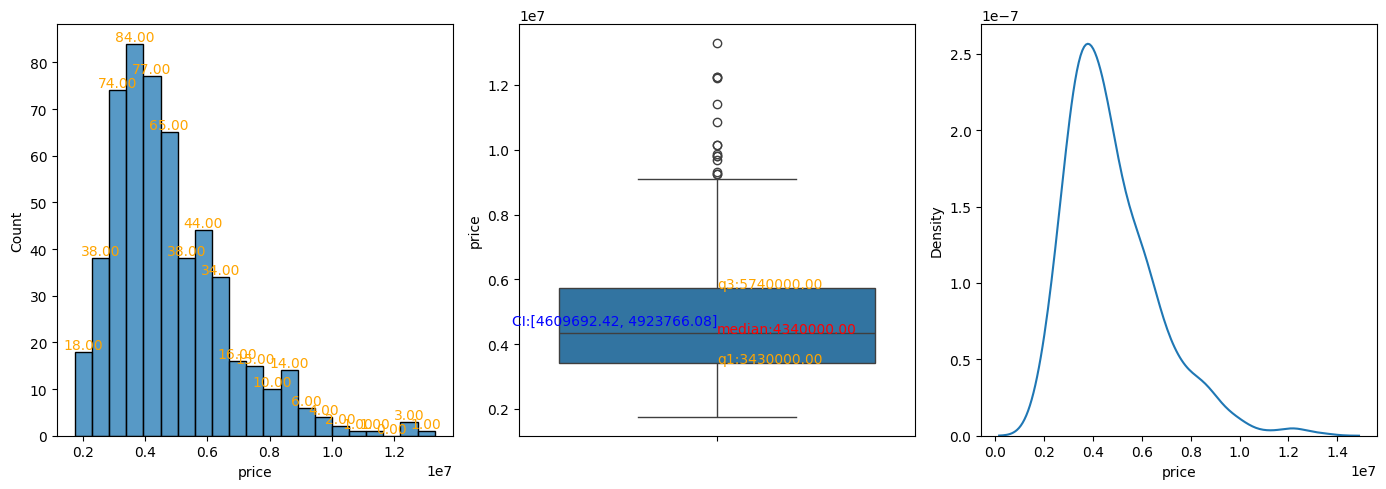

In [20]:
# price分布情况
plt.rcParams["figure.figsize"]=[14.00,5.00]
plt.rcParams["figure.autolayout"]=True
figure, axes = plt.subplots(1,3)
a = sns.histplot(clean_house_price, x="price", ax=axes[0])
for i in a.patches:
    a.annotate(f"{i.get_height():.2f}", (i.get_x() + i.get_width()/2., i.get_height()), ha="center", va="bottom", color="orange")
sns.boxplot(clean_house_price, y="price", ax=axes[1])
median = clean_house_price["price"].median()
q1 = clean_house_price["price"].quantile(0.25)
q3 = clean_house_price["price"].quantile(0.75)
CI = [clean_house_price["price"].mean() - 1.96*clean_house_price["price"].std()/np.sqrt(len(clean_house_price["price"])), clean_house_price["price"].mean() + 1.96*clean_house_price["price"].std()/np.sqrt(len(clean_house_price["price"]))]

axes[1].text(0, median, f"median:{median:.2f}", color="red")
axes[1].text(0, q1, f"q1:{q1:.2f}", color="orange")
axes[1].text(0, q3, f"q3:{q3:.2f}", color="orange")
axes[1].text(0, CI[0], f"CI:[{CI[0]:.2f}, {CI[1]:.2f}]", horizontalalignment="right", color="blue")

sns.kdeplot(clean_house_price, x="price", ax=axes[2])


plt.show()

从图形中可见，房价分布呈右偏态，就是说大部分房价数据集中在左侧，少部分高房价拉高了平均值，使得均值大于median中值。房价分布以0.3-0.6之间较多，可见购房需求以中等偏低房价为主。

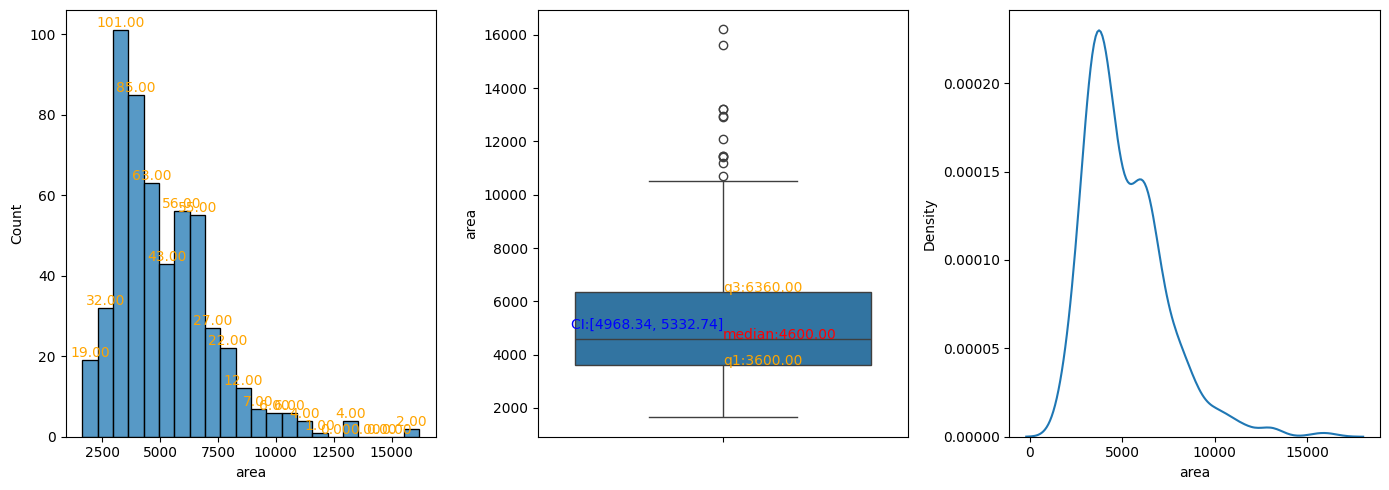

In [21]:
# area分布情况
figure, axes = plt.subplots(1,3)
a = sns.histplot(clean_house_price, x="area", ax=axes[0])
for i in a.patches:
    a.annotate(f"{i.get_height():.2f}", (i.get_x() + i.get_width()/2., i.get_height()), ha="center", va="bottom", color="orange")
sns.boxplot(clean_house_price, y="area", ax=axes[1])
median = clean_house_price["area"].median()
q1 = clean_house_price["area"].quantile(0.25)
q3 = clean_house_price["area"].quantile(0.75)
CI = [clean_house_price["area"].mean() - 1.96*clean_house_price["area"].std()/np.sqrt(len(clean_house_price["area"])), clean_house_price["area"].mean() + 1.96*clean_house_price["area"].std()/np.sqrt(len(clean_house_price["area"]))]

axes[1].text(0, median, f"median:{median:.2f}", color="red")
axes[1].text(0, q1, f"q1:{q1:.2f}", color="orange")
axes[1].text(0, q3, f"q3:{q3:.2f}", color="orange")
axes[1].text(0, CI[0], f"CI:[{CI[0]:.2f}, {CI[1]:.2f}]", horizontalalignment="right", color="blue")

sns.kdeplot(clean_house_price, x="area", ax=axes[2])


plt.show()

如图所示，房屋面积的密度图呈现右偏态近似多峰情况，但多峰不明显，一方面说明数据量不够庞大，另一方面也说明，这些数据可能来源于两部分。但由于未形成双峰形态，所以目前暂时忽略仍视为单峰右偏态。  
客户购房仍以中等面积为准，大部分集中在3600-6360之间，有极少数面积较大的数据拉高了数值，使得均值大于中值。

In [22]:
clean_house_price["area"].value_counts()

area
6000    24
3000    14
4500    13
4000    11
6600     9
        ..
3360     1
1700     1
3649     1
2990     1
3620     1
Name: count, Length: 284, dtype: int64

In [23]:
clean_area = clean_house_price.query('area > 10000')
clean_area["area"].value_counts()

area
10500    3
13200    2
16200    1
11440    1
11175    1
12090    1
15600    1
11460    1
10269    1
11410    1
10700    1
12900    1
10240    1
10360    1
12944    1
Name: count, dtype: int64

In [24]:
area_bin = [3000, 6000, 10000, 13500, 20000]
area_label = ["小户型", "中户型", "大户型", "超大户型"]
clean_house_price["ApartmentType"] = pd.cut(clean_house_price["area"], area_bin, labels=area_label)
clean_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,ApartmentType
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,中户型
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,中户型
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,中户型
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,中户型
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,中户型
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,中户型
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,中户型
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,超大户型
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,中户型
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,小户型


In [25]:
clean_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
 13  ApartmentType     479 non-null    category
dtypes: category(8), int64(6)
memory usage: 31.0 KB


In [26]:
import matplotlib
from matplotlib.font_manager import FontManager
gl_font = set(f.name for f in FontManager().ttflist)
for i in sorted(gl_font):
    print(i)

Agency FB
Algerian
Arial
Arial Rounded MT Bold
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Book Antiqua
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Californian FB
Calisto MT
Cambria
Candara
Castellar
Centaur
Century
Century Gothic
Century Schoolbook
Chiller
Colonna MT
Comic Sans MS
Consolas
Constantia
Cooper Black
Copperplate Gothic Bold
Copperplate Gothic Light
Corbel
Courier New
Curlz MT
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
DengXian
Dubai
Ebrima
Edwardian Script ITC
Elephant
Engravers MT
Eras Bold ITC
Eras Demi ITC
Eras Light ITC
Eras Medium ITC
FZShuTi
FZYaoTi
FangSong
Felix Titling
Footlight MT Light
Forte
Franklin Gothic Book
Franklin Gothic Demi
Franklin Gothic Demi Cond
Franklin Gothic Heavy
Franklin Gothic Medium
Franklin Gothic Medium Cond
Freestyle Script
French Script MT
Gabriola
Gadug

In [27]:
matplotlib.rc("font", family="SimHei")

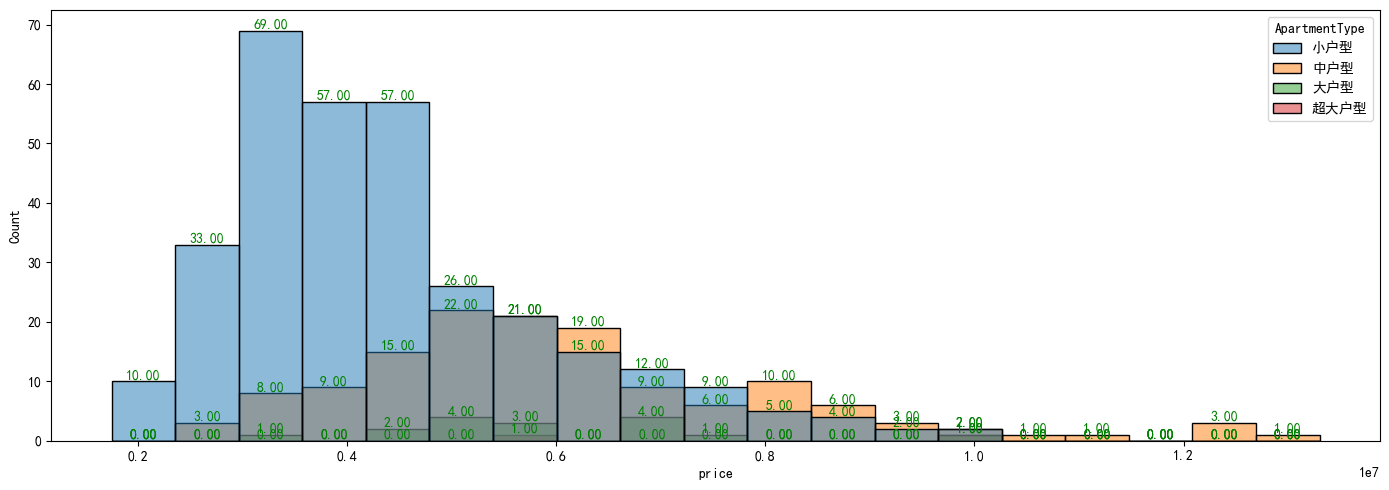

In [28]:
# price和ApartmentType之间的关系
a = sns.histplot(clean_house_price, x="price", hue="ApartmentType")
for i in a.patches:
    a.annotate(f"{i.get_height():.2f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

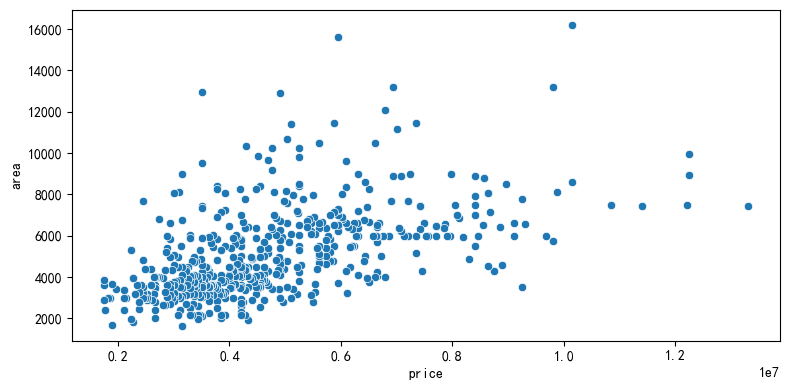

In [29]:
# price和area之间的关系
plt.figure(figsize=(8,4))
sns.scatterplot(clean_house_price, x="price", y="area")
plt.show()

从散点图上看，绝大部分数据有明显的线性特征，但是也有部分散点较为分散，这个需要后续我们在拟合时查看具体r的线性数值。

In [30]:
clean_house_price[clean_house_price["area"] >= 13500]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,ApartmentType
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,超大户型
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished,超大户型


从图形上看，房屋的价格与房屋的规模不完全呈正比。大部分小户型价位集中在0.2-0.6之间，少部分小户型价位分布在0.6-0.9之间。  
中等户型价位主要集中在0.4-0.9之间，0.2-0.4之间也有一部分，但数量不多。  
大户型价位主要集中在0.42-0.7之间，图中有一条数据分布到了0.3-0.35之间，说明这个房屋有一些特殊原因在大户型中售价较低。  
超大户型的只有两个，价位集中在1.0。  

结论：price和ApartmentType，在小户型和种户型之间成正比。大户型分布较为离散，可能与其他因素有关，需要我们之后再对其他变量与price之间的关系进行分析。超大户型并没有按预期那样分布在价位最高的位置，说明可能与其他比如是否挨着主路等因素有关。

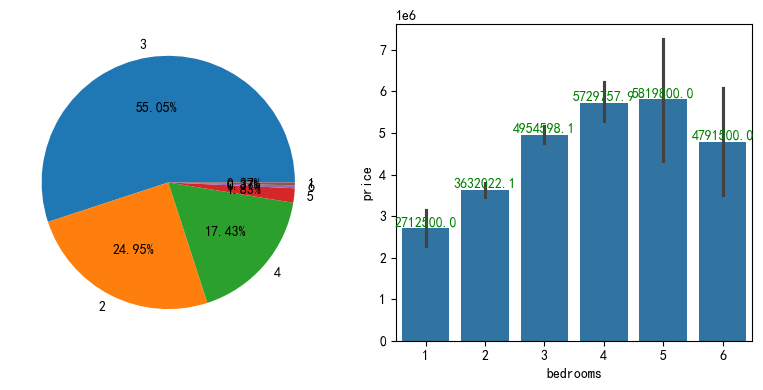

In [31]:
# price与bedrooms的关系
figure, axes = plt.subplots(1, 2, figsize=(8, 4))
bedrooms_value = clean_house_price["bedrooms"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="bedrooms", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

从饼状图可见，3个卧室的占比超过了一半，其次是2卧室和4卧室的，0、1、5卧室的极少。  
从条形图来看，price随着bedrooms的数量增加而增加，但是超过5个卧室之后，价钱反而降低了。所以1-5个卧室的房子是比较符合市场需求的。

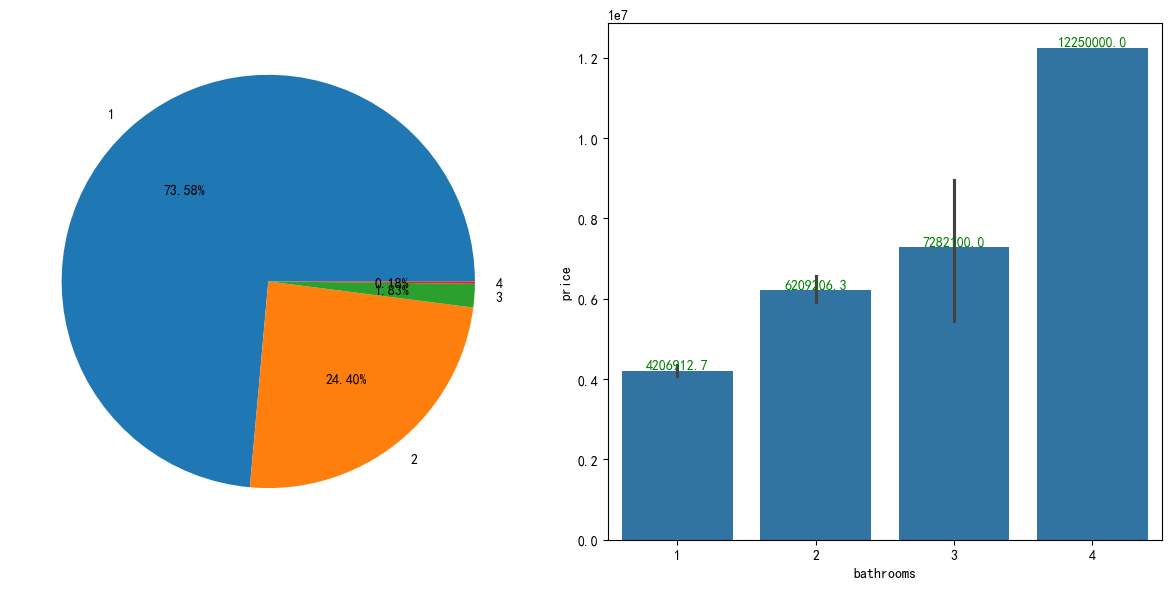

In [32]:
# price与bathrooms的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["bathrooms"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="bathrooms", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

从饼状图中可见，1个厕所的占比最大，是最受欢迎的。其次的是2个厕所的，占比24.40%，也是部分客户的选择。3个占比1.83%，4个只占了0.18%。说明市场对于2个以上厕所数量的需求不是刚需。但从条形图上可见，厕所数量与房价是成正比例的。这也说明厕所对房价有一定正向影响。

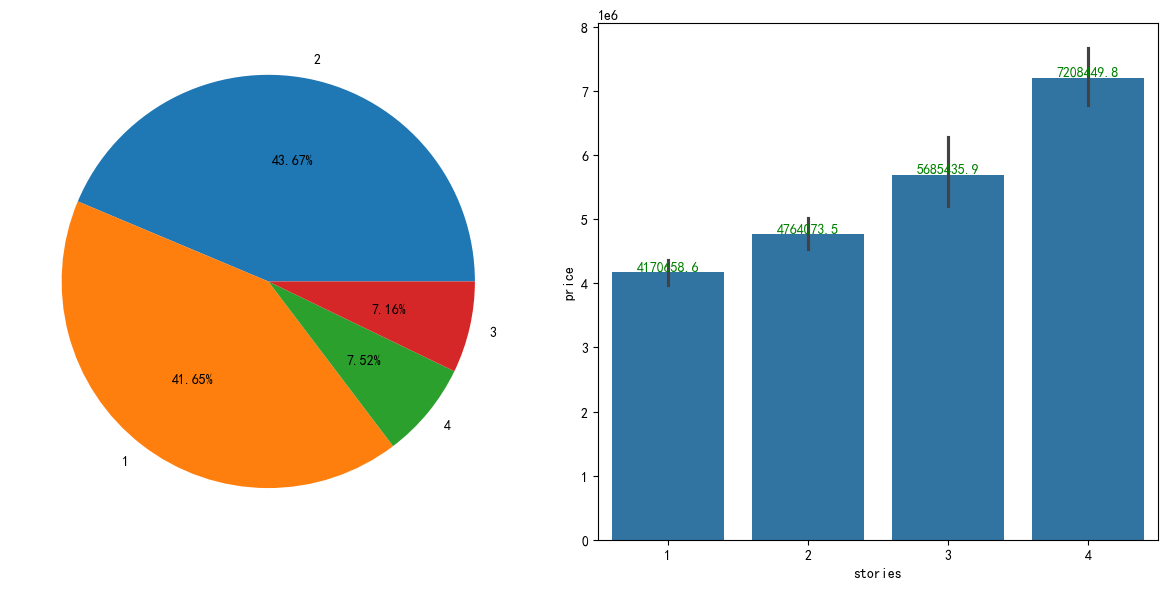

In [33]:
# price与stories的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["stories"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="stories", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

从饼状图可见，2层是比较受欢迎的，1层仅次于2层，1-2层是大部分客户首选的楼层。3-4层的受众群体比较小，占比相近。但从条形图上看，楼层越高，价格越贵。这说明市场对楼层的高度是认可的，高楼层等同高居住质量。之所以3-4层占比较小，很有可能是性价比不高的原因。

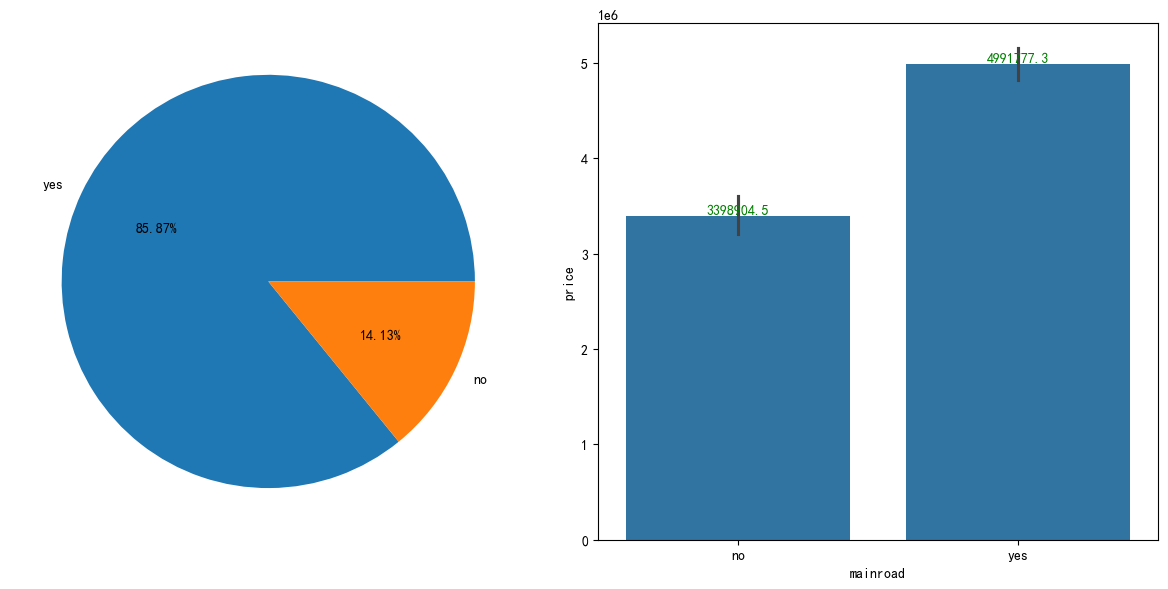

In [34]:
# price与mainroad的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["mainroad"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="mainroad", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

挨着主路的占比85.87%，是绝大部分客户首选的户型。非邻主路的占比只有14.13%，市场需求较低。临近主路的户型价钱接近500w，非临近主路的约340w，两者相差较大，近160w。如此价位差的情况下，临主路的户型还占比85.87%，说明mainroad这一项在客户选房时是首要考虑的重要因素。

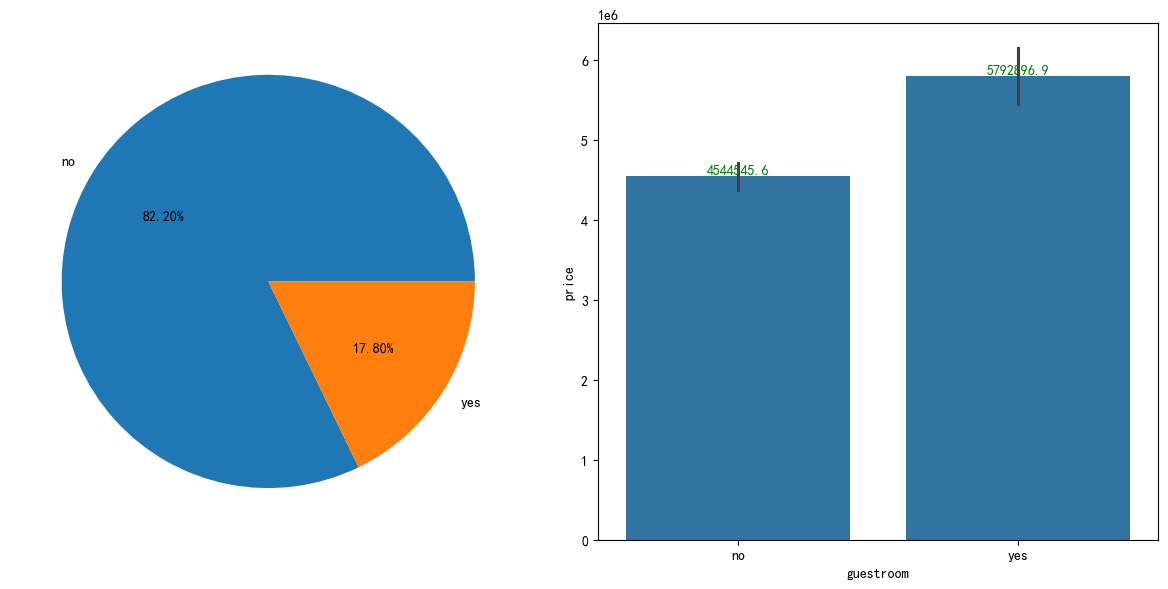

In [35]:
# price与guestroom的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["guestroom"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="guestroom", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

无guestroom的占比82.20%，而有guestroom的房子价位更高，两者相差130w，综上数据可预测，客户在购房时，是否有guestroom不是主要参考要素，与客房比起来，价钱更少的更受市场追捧。  
结论：客户会首先考虑价位，其次考虑是否有guestroom，客户不会在乎是否没有客房。

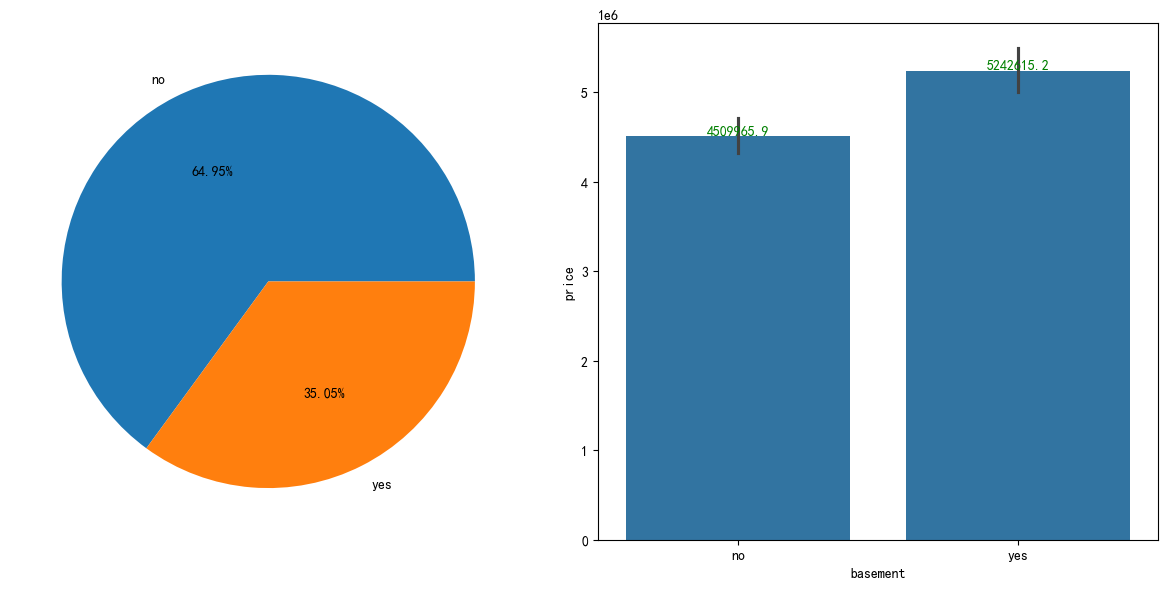

In [36]:
# price与basement的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["basement"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="basement", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

没有地下室basement的占比是有地下室的约2倍。有地下室的价钱比没有地下室的贵了近74w。  
结论：客户购房时，不会首先考虑要一个地下室，绝大部分人群会选择没有地下室的。也有一部分人会选择有地下室的。这说明人们喜欢地下室，但地下室不是刚需，客户会先考虑价钱，再考虑地下室。

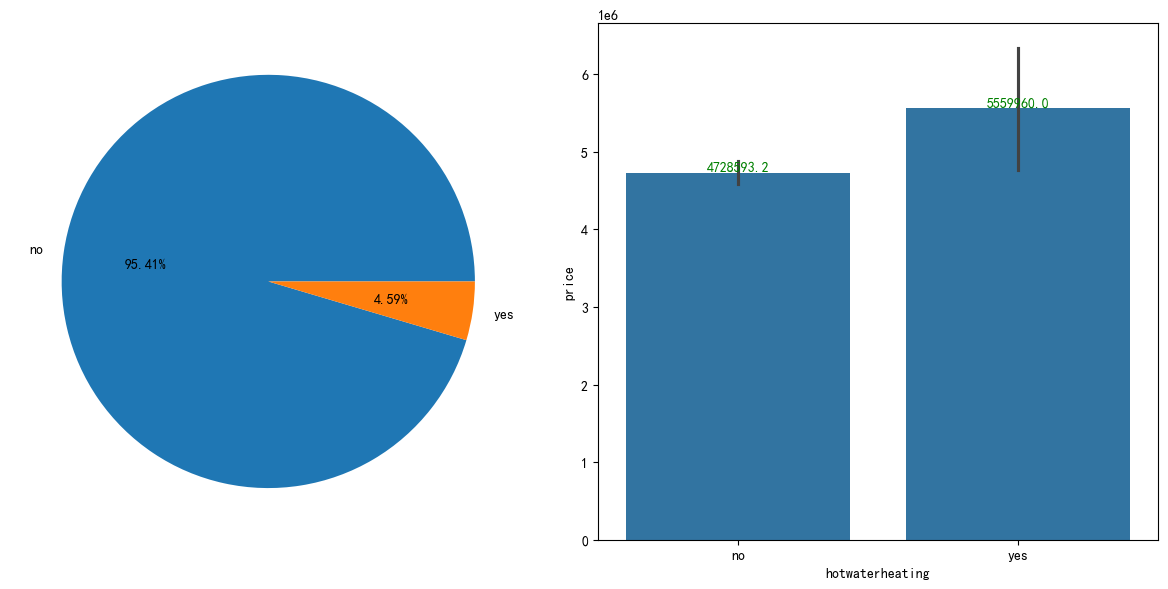

In [37]:
# price与hotwaterheating的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["hotwaterheating"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="hotwaterheating", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

选择没有热水器的客户占了95.41，同时没有热水器的房屋价格会低83w，从数据上看，客户更青睐没有热水器的房子。价钱还是首要考虑的条件。

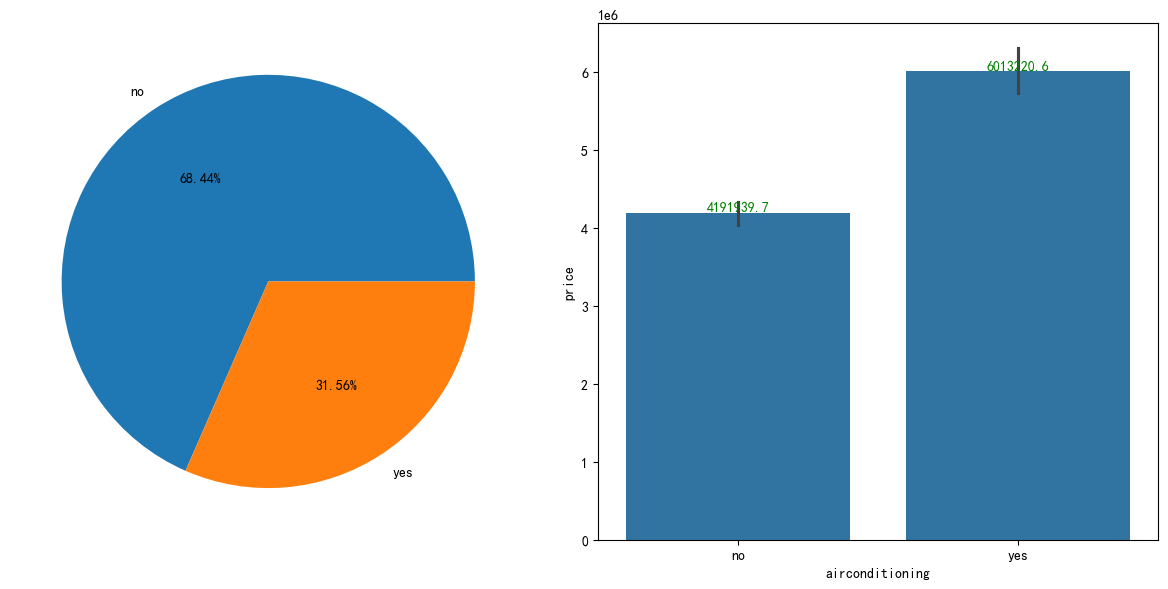

In [38]:
# price与airconditioning的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["airconditioning"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="airconditioning", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

选择没有空调的客户占比是选择有空调的2倍还多。没有空调的售价比有空调低了近182w，客户觉得没有空调的性价比更高。  
结论：大部分客户会优先考虑price，也有部分客户在资金充裕的情况下考虑选择有空调的房子。

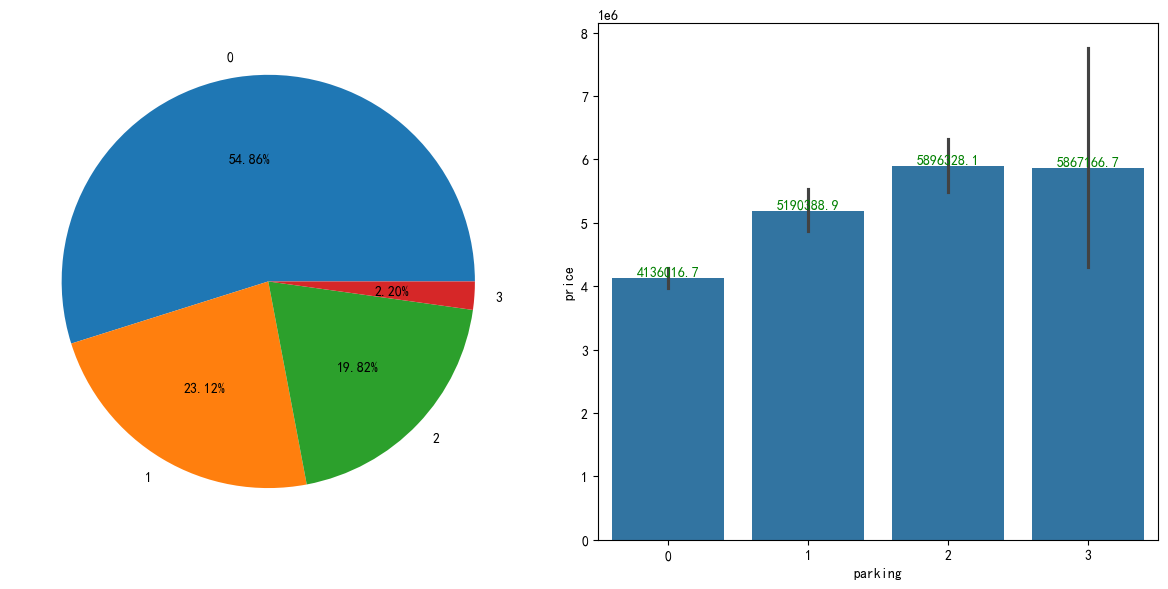

In [39]:
# price与parking的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["parking"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="parking", y="price", ax=axes[1])
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

从饼图上看，有超过一半的客户选择了0parking的户型，选择1parking和2parking的占比接近，1parking的更多一些。选择3parking的客户仅占比2.20%。很明显0parking最受欢迎，1-2parking次之，3parking最不受欢迎。  
从条形图上看，0-2parking与price成正比，容量越大价钱越贵，但是3parking反而比2parking的价位更低。由此分析，可能有其他因素在影响着客户需求。比如2parking的需求比3parking还多，可能跟房屋的位置prefarea有关系。接下来我们要看一下prefarea、price和parking之间的关系来印证一下

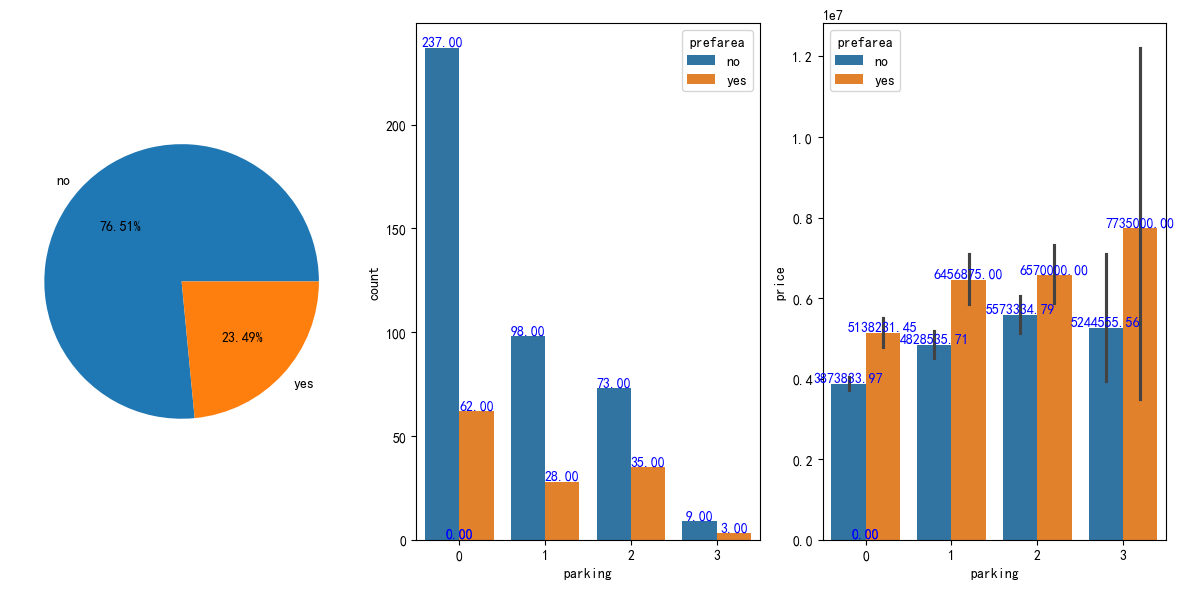

In [40]:
# price与parking和prefarea的关系
figure, axes = plt.subplots(1, 3, figsize=(12, 6))
a = sns.barplot(clean_house_price, x="parking", y="price", hue="prefarea", ax=axes[2])
for f in a.patches:
    a.annotate(f"{f.get_height():.2f}", (f.get_x()+f.get_width()/2., f.get_height()), ha="center", va="bottom", color="blue")
b = sns.countplot(clean_house_price, x="parking", hue="prefarea", ax=axes[1])
for f in b.patches:
    b.annotate(f"{f.get_height():.2f}", (f.get_x()+f.get_width()/2., f.get_height()), ha="center", va="bottom", color="blue")
prefarea_value = clean_house_price["prefarea"].value_counts()
prefarea_label = prefarea_value.index
axes[0].pie(prefarea_value, labels=prefarea_label, autopct="%.2f%%")
plt.show()

饼图所示，选择非城市位置的客户占比达76.51，从第一个条形图可见大部分客户首选的是非城市位置的房子，在非城市位置房子中，选择0parking的有237位，1parking的98位，2parking的73位，选择3parking的仅9位，同样选择城市位置的0parking62,1parking28,2parking35,3parking3.  
从第二个柱状图可见price与parking呈正比。尤其位于城市位置的房子，车库容量越大价钱越贵。  
从如上数据可得出结论：客户在购房时，首先考虑的是price，其次是parking，绝大部分客户会放弃parking来降低购房成本。

In [41]:
clean_house_price.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,ApartmentType
480,2940000,3480,3,1,2,no,no,no,no,no,1,no,semi-furnished,小户型


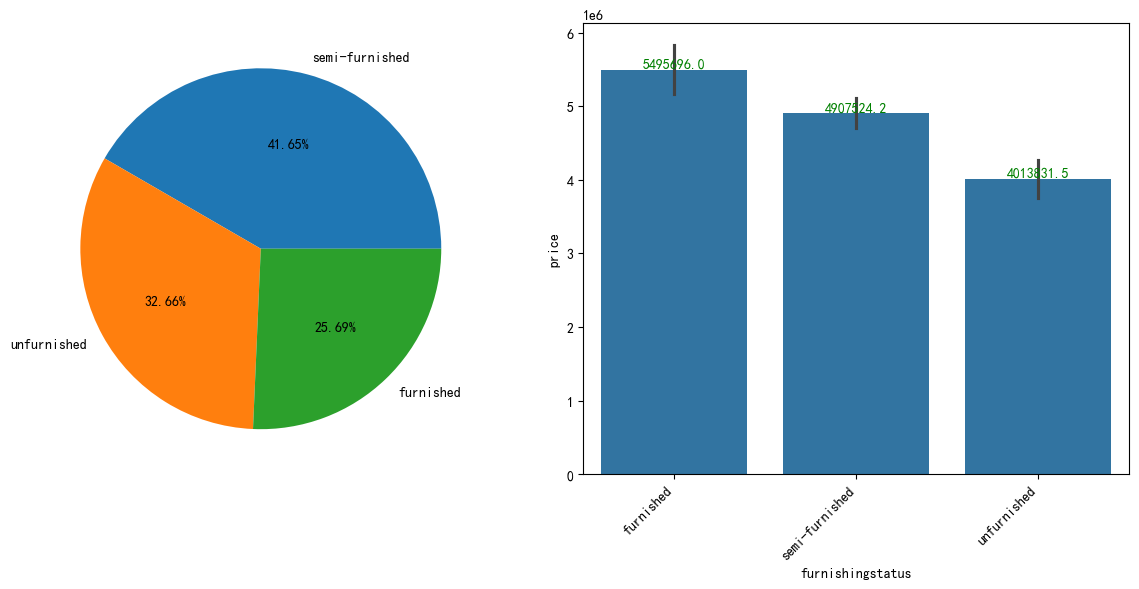

In [42]:
# price与furnishingstatus的关系
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
bedrooms_value = clean_house_price["furnishingstatus"].value_counts()
bedrooms_label = bedrooms_value.index
axes[0].pie(bedrooms_value, labels=bedrooms_label, autopct="%.2f%%")
a = sns.barplot(clean_house_price, x="furnishingstatus", y="price", ax=axes[1])
xticks = axes[1].get_xticks()
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment="right")
for i in a.patches:
    a.annotate(f"{i.get_height():.1f}", (i.get_x()+i.get_width()/2., i.get_height()), ha="center", va="bottom", color="green")
plt.show()

饼图所示，选择简装的客户占比41.65%，然后是毛坯房，占比32.66%，最后是精装，占比25.69%。  
从条形图上看，是price与furnishingstatus是呈现正比的关系。  
由此推断：大部分选择简装房屋购买，首先考虑的是拎包入住，价位适中。部分客户会选择价位最低的毛坯房。少数客户在资金允许的情况下选择一步到位的精装修。市场需求更倾向于简装房。其次是毛坯房。

## 分析数据

In [43]:
import statsmodels.api as sm

在做线性回归之前，我们先将ApartmentType这项删除，因为我们更关心具体面积数值对价位的影响而非大范围的户型。

In [44]:
clean_house_price.drop(columns=["ApartmentType"], inplace=True)

In [45]:
clean_house_price.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
452,3150000,9000,3,1,2,yes,no,no,no,no,2,no,semi-furnished


此次分析的目的是以house_price为基础，建立线性回归模型来预测房价。我们先引入虚拟变量，将所有非数字的分类变量转换成0/1形式。  
另外为了防止误操作和区分图形化的文件，我们将此次建立模型的文件名命名为：lr_house_price.

In [46]:
lr_house_price = clean_house_price.copy()

In [47]:
lr_house_price.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
475,2961000,3000,2,1,2,yes,no,no,no,no,0,no,semi-furnished


In [48]:
lr_house_price = pd.get_dummies(lr_house_price, columns=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], dtype="int", drop_first=True)

创建自变量x和因变量y，我们要预测的模型时price，所以price是因变量y，其他列均为自变量x。

In [49]:
y = lr_house_price["price"]
x = lr_house_price.drop(columns=["price"])

查看自变量x的相关系数：

In [50]:
x.corr().abs()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,0.009229,0.222393,0.234779,0.006156,0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,0.172394,0.018847,0.293602,0.044425,0.003648,0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,0.165705
mainroad_yes,0.288874,0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,0.011781,0.105423,0.199876,0.011450,0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,0.010308,0.138179,0.160897,0.005821,0.099023
basement_yes,0.047417,0.097312,0.102106,0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,0.117935
hotwaterheating_yes,0.009229,0.046049,0.067159,0.018847,0.067864,0.011781,0.010308,0.004385,1.000000,0.130023,0.059411,0.063819,0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,0.130023,1.000000,0.117382,0.053179,0.094086


In [51]:
x.corr().abs() >= 0.75

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


不同变量之间的相关系数均在0.75以内，说明各自相关度较为独立，不会产生共线性问题，可用。

引入截距x

In [52]:
x = sm.add_constant(x)

In [53]:
x.sample(4)

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
132,1.0,5200,3,1,3,0,1,0,0,0,1,0,1,0
270,1.0,4500,3,2,3,1,1,0,0,1,0,0,0,0
212,1.0,3420,4,2,2,2,1,0,1,0,1,0,1,0
211,1.0,12900,3,1,1,2,1,0,0,0,0,0,0,0


创建模型并查看result结果

In [54]:
result = sm.OLS(y, x).fit()

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          9.07e-123
Time:                        13:25:12   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

从如上数据显示，R-squared:	0.682，拟合度较低，相关系数P>|t|中有三项较大，我们选择适中的相关系数0.05，const、bedrooms和furnishingstatus_semi-furnished的相关系数都超过了这个数值，我们需要将他们删掉后再次拟合。

In [56]:
x.drop(columns=["const", "bedrooms", "furnishingstatus_semi-furnished"], inplace=True)

In [57]:
result = sm.OLS(y, x).fit()

In [58]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):                        0.00
Time:                        13:25:12   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared (uncentered):	0.957 拟合度超过95%，P值都小于0.05。

### 预测房价

**要预测房价的房屋的信息：**  
**面积为6500平方英尺，有3个卧室、1个厕所，总共2层，不位于主路，无客人房，无地下室，无热水器，有空调，车位数为0，位于城市首选社区，简装修**  
**面积为16000平方英尺，有4个卧室、3个厕所，总共3层，位于主路，有客人房，带地下室，无热水器，无空调，车位数为2，不在城市首选社区，毛坯房装修**  
**面积为13500平方英尺，有3个卧室、2个厕所，总共1层，位于主路，有客人房，带地下室，有热水器，有空调，车位数为1，位于城市首选社区，精装修**  

In [59]:
lr_house_price.sample()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
314,4095000,4040,2,1,2,1,1,0,0,0,0,0,1,0


In [60]:
house_price_predict = pd.DataFrame({"area":[6500, 16000, 13500], "bedrooms":[3, 4, 3], "bathrooms":[1, 3, 2], "stories":[2, 3, 1], "parking":[0, 2, 1], "mainroad":["no", "yes", "yes"], "guestroom":["no", "yes", "yes"], "basement":["no", "yes", "yes"], "hotwaterheating":["no", "no", "yes"], "airconditioning":["yes", "no", "yes"], "prefarea":["yes", "no", "yes"], "furnishingstatus":["semi-furnished", "unfurnished", "furnished"]})

In [61]:
house_price_predict

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,6500,3,1,2,0,no,no,no,no,yes,yes,semi-furnished
1,16000,4,3,3,2,yes,yes,yes,no,no,no,unfurnished
2,13500,3,2,1,1,yes,yes,yes,yes,yes,yes,furnished


数据较少，可见数据满足每行是一个实例，每列是一个变量，每个单元格是一个值的要求。  
数据无缺失、重复、不一致或者不合理数据。  
数据可以直接用。  
我们需要先将分类变量转换成category类型，并保证包含所有建模数据的变量。

In [62]:
house_price_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              3 non-null      int64 
 1   bedrooms          3 non-null      int64 
 2   bathrooms         3 non-null      int64 
 3   stories           3 non-null      int64 
 4   parking           3 non-null      int64 
 5   mainroad          3 non-null      object
 6   guestroom         3 non-null      object
 7   basement          3 non-null      object
 8   hotwaterheating   3 non-null      object
 9   airconditioning   3 non-null      object
 10  prefarea          3 non-null      object
 11  furnishingstatus  3 non-null      object
dtypes: int64(5), object(7)
memory usage: 420.0+ bytes


In [63]:
house_price_predict["mainroad"] = pd.Categorical(house_price_predict["mainroad"], categories=["no", "yes"])
house_price_predict["guestroom"] = pd.Categorical(house_price_predict["guestroom"], categories=["no", "yes"])
house_price_predict["basement"] = pd.Categorical(house_price_predict["basement"], categories=["no", "yes"])
house_price_predict["hotwaterheating"] = pd.Categorical(house_price_predict["hotwaterheating"], categories=["no", "yes"])
house_price_predict["airconditioning"] = pd.Categorical(house_price_predict["airconditioning"], categories=["no", "yes"])
house_price_predict["prefarea"] = pd.Categorical(house_price_predict["prefarea"], categories=["no", "yes"])
house_price_predict["furnishingstatus"] =pd.Categorical(house_price_predict["furnishingstatus"], categories=["furnished", "semi-furnished", "unfurnished"])

In [64]:
house_price_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   area              3 non-null      int64   
 1   bedrooms          3 non-null      int64   
 2   bathrooms         3 non-null      int64   
 3   stories           3 non-null      int64   
 4   parking           3 non-null      int64   
 5   mainroad          3 non-null      category
 6   guestroom         3 non-null      category
 7   basement          3 non-null      category
 8   hotwaterheating   3 non-null      category
 9   airconditioning   3 non-null      category
 10  prefarea          3 non-null      category
 11  furnishingstatus  3 non-null      category
dtypes: category(7), int64(5)
memory usage: 1.1 KB


查看模型所需变量

In [65]:
result.params

area                            2.575854e+02
bathrooms                       1.070617e+06
stories                         5.084424e+05
parking                         2.793322e+05
mainroad_yes                    4.671873e+05
guestroom_yes                   2.850968e+05
basement_yes                    4.016126e+05
hotwaterheating_yes             8.667863e+05
airconditioning_yes             8.543239e+05
prefarea_yes                    6.442674e+05
furnishingstatus_unfurnished   -3.492983e+05
dtype: float64

引入虚拟变量

In [66]:
house_price_predict = pd.get_dummies(house_price_predict, columns=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], dtype="int", drop_first=True)

In [67]:
house_price_predict

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,3,1,2,0,0,0,0,0,1,1,1,0
1,16000,4,3,3,2,1,1,1,0,0,0,0,1
2,13500,3,2,1,1,1,1,1,1,1,1,0,0


bedrooms和furnishingstatus_semi-furnished不在模型中，需要删除。

In [70]:
new_house_price_predict = house_price_predict.drop(columns=["bedrooms", "furnishingstatus_semi-furnished"])

In [71]:
new_house_price_predict

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,6500,1,2,0,0,0,0,0,1,1,0
1,16000,3,3,2,1,1,1,0,0,0,1
2,13500,2,1,1,1,1,1,1,1,1,0


In [72]:
x = sm.add_constant(new_house_price_predict)

In [73]:
x

,const,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,1.0,6500,1,2,0,0,0,0,0,1,1,0
1,1.0,16000,3,3,2,1,1,1,0,0,0,1
2,1.0,13500,2,1,1,1,1,1,1,1,1,0


In [74]:
predict_value = result.predict(new_house_price_predict)

In [75]:
predict_value

0    5.260397e+06
1    1.022181e+07
2    9.925684e+06
dtype: float64

In [76]:
house_price_predict["price"] = predict_value

In [77]:
house_price_predict

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,6500,3,1,2,0,0,0,0,0,1,1,1,0,5.260397e+06
1,16000,4,3,3,2,1,1,1,0,0,0,0,1,1.022181e+07
2,13500,3,2,1,1,1,1,1,1,1,1,0,0,9.925684e+06


In [80]:
house_noprice = pd.DataFrame({"area":[6500, 16000, 13500], "bedrooms":[3, 4, 3], "bathrooms":[1, 3, 2], "stories":[2, 3, 1], "parking":[0, 2, 1], "mainroad":["no", "yes", "yes"], "guestroom":["no", "yes", "yes"], "basement":["no", "yes", "yes"], "hotwaterheating":["no", "no", "yes"], "airconditioning":["yes", "no", "yes"], "prefarea":["yes", "no", "yes"], "furnishingstatus":["semi-furnished", "unfurnished", "furnished"]})

In [81]:
house_noprice

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,6500,3,1,2,0,no,no,no,no,yes,yes,semi-furnished
1,16000,4,3,3,2,yes,yes,yes,no,no,no,unfurnished
2,13500,3,2,1,1,yes,yes,yes,yes,yes,yes,furnished


In [82]:
house_noprice.to_csv(r"C:\Users\LENOVO\Desktop\数据分析文件夹\我的数据分析文件夹\分析挖掘拟合\房价预测\house_noprice.csv")

In [83]:
house_price_predict.to_csv(r"C:\Users\LENOVO\Desktop\数据分析文件夹\我的数据分析文件夹\分析挖掘拟合\房价预测\house_price_predict.csv")